In [4]:
# @title 🏃‍♀️ Install Ersilia on Colab

%%capture
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh -O Miniconda_installer.sh
!chmod +x Miniconda_installer.sh
!./Miniconda_installer.sh -b -f -p /usr/local

!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')




In [6]:
# @title 🔗 Connect Colab to your Google Drive

## Mount google drive
from google.colab import drive

drive.mount("/content/drive/")

Mounted at /content/drive/


In [7]:
# specify your input folder

input_folder = "/content/drive/MyDrive/ersilia"  # @param {type:"string"}

In [8]:
# specify your output folder

output_folder = "/content/drive/MyDrive/ersilia"

In [9]:
# specify the name of your input csv file

input_filename = "chemcomp"  # @param {type:"string"}

In [10]:
# specify the SMILES column name
smiles_column = "ISOSMILES"  # @param {type:"string"}

In [11]:
# @title 🔤 Extract SMILES to a list
import pandas as pd

path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")


My dataset contains 1000 SMILES


In [12]:

# Enter the model name
# This is just an example, make sure to adapt it to your specific model

model_name = "eos74bo"  # @param {type:"string"}


In [13]:
# @title 📥 Fetch the model
import time

begin = time.time()
!ersilia -v fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")

⬇️  Fetching model eos74bo: ncats-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
20:42:12 | DEBUG    | Initialized with URL: None
20:42:12 | DEBUG    | Starting fetching procedure
20:42:12 | DEBUG    | Trying to find an available URL where the model is hosted
20:42:13 | DEBUG    | No hosted URL found for this model
20:42:13 | DEBUG    | There is no hosted URL available for this model
20:42:13 | DEBUG    | Docker is not installed in your local
20:42:13 | INFO     | GitHub CLI is not installed. Ersilia can work without it, but we highy recommend that you install this tool.
20:42:13 | DEBUG    | Git LFS is installed
Git LFS initialized.
20:42:13 | DEBUG    | Git LFS has been activated
20:42:13 | DEBUG    | Connected to the internet
20:42:13 | DEBUG    | Conda is installed
20:42:13 | DEBUG    | EOS Home path exists
20:42:13 | INFO     | Starting delete of model eos74bo
20:42:13 | DEBUG    | Attempting Bento delete
  Running command git clo

In [14]:
!ersilia serve $model_name

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos74bo: ncats-solubility

   URL: http://127.0.0.1:47141
   PID: 16090
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


In [15]:
# @title Ensuring All SMILES are Strings

import pandas as pd

path = "%s/%s.csv" % (input_folder, input_filename)
df = pd.read_csv(path)

df['ISOSMILES'] = df['ISOSMILES'].apply(lambda x: x if isinstance(x, str) else None)

df.dropna(subset=['ISOSMILES'], inplace=True)

smiles = df['ISOSMILES'].tolist()

In [16]:
# @title ⚡ Run predictions
from ersilia import ErsiliaModel
import pandas as pd
import time

model = ErsiliaModel(model_name)

results = []

for single_smiles in smiles:
    begin = time.time()
    try:
        output = model.api(input=single_smiles, output="pandas")
        results.append(output)
    except Exception as e:
        print(f"Error processing SMILES {single_smiles}: {e}")
    end = time.time()
    print(f"Processed SMILES: {single_smiles}, Time taken: {round((end - begin), 2)} seconds")

final_results = pd.concat(results, ignore_index=True)

print("All predictions successful 👍!")
print(final_results)

model.close()


Processed SMILES: CC1(C(C1C(=O)OCC2=CC(=CC=C2)OC3=CC=CC=C3)C=C(Cl)Cl)C, Time taken: 8.85 seconds
Processed SMILES: CC(C)(C)CC(C)(C)C1=CC=C(C=C1)OCCOCC[N+](C)(C)CC2=CC=CC=C2.[Cl-], Time taken: 6.85 seconds
Processed SMILES: CCCCCCCCCC[N+](C)(C)CCCCCCCCCC.[Cl-], Time taken: 7.54 seconds
Processed SMILES: C(=O)([O-])[O-].[Ca+2], Time taken: 6.85 seconds
Processed SMILES: COP(=O)(C(C(Cl)(Cl)Cl)O)OC, Time taken: 7.03 seconds
Processed SMILES: C(CCl)NP(=O)(NCCBr)O, Time taken: 7.92 seconds
Processed SMILES: CC(=CC1C(C1(C)C)C(=O)OCC2=CC(=CC=C2)OC3=CC=CC=C3)C, Time taken: 6.79 seconds
Processed SMILES: C[C@]12CC[C@H]3[C@H]([C@@H]1CCC(=O)N2)CCC4=C3C=CC(=C4)OC(=O)CC5=CC=C(C=C5)N(CCCl)CCCl, Time taken: 7.81 seconds
Processed SMILES: C1=CC(=CC=C1C[C@@H](C(=O)O)N)N(CCCl)CCCl, Time taken: 6.83 seconds
Processed SMILES: C[C@H]1[C@@H]([C@H](C[C@@H](O1)O[C@H]2CC[C@]3([C@@H](C2)CC[C@@H]4[C@@H]3CC[C@]5([C@@]4(C[C@@H]([C@@H]5C6=CC(=O)OC6)OC(=O)C)O)C)C)OC)O, Time taken: 7.73 seconds
Processed SMILES: CC[Hg

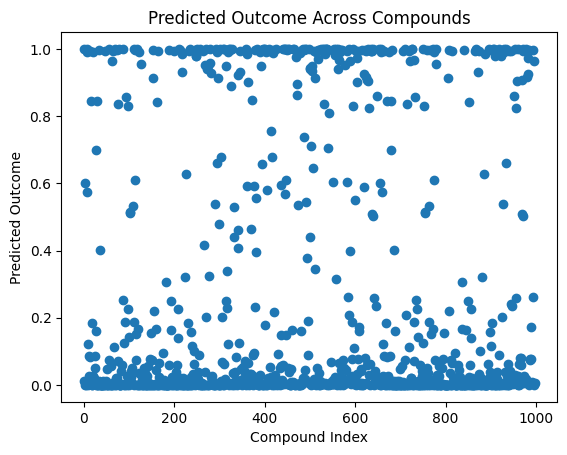

In [22]:
import matplotlib.pyplot as plt

# use a generated index as a stand-in for the compounds. outcome vs compound index (using DataFrame index as the compound index)

fig, ax2 = plt.subplots()
ax2.scatter(final_results.index, final_results['outcome'])
ax2.set_title('Predicted Outcome Across Compounds')
ax2.set_xlabel('Compound Index')
ax2.set_ylabel('Predicted Outcome')
plt.show()


In [17]:
# @title ✔️ Check your results

print(output.head())

                           key  \
0  WRRMANBPWLZBTA-GHMZBOCLSA-N   

                                               input  outcome  
0  C1=C([C@H](O[C@H]1N2C=NC3=C(N=CN=C32)N)CO)NP(=...    0.005  


In [19]:
output_path = "%s/%s_output.csv" % (output_folder, model_name)
output.to_csv(output_path, index=False)